# Multiprocesamiento

La biblioteca de multiprocesamiento es una estándar de Python que admitir la computación en paralelo mediante procesos.

Presentaremos los conceptos básicos para que pueda comenzar con la computación paralela.

In [1]:
import multiprocessing as mp

Encontremos el numero total de nucleos del CPU que podemos usar para multiprocesamiento:

In [4]:
print(f'Numero de CPUs: {mp.cpu_count()}')

Numero de CPUs: 12


Veamos un ejemplo de como podemos optimizar tiempo utilizando multiprocesamiento

Generemos 10 000 000 numeros aleatorios entre 0 y 10, y calculemos su potencia 2, despues guardemos esto en una lsita.

In [5]:
import numpy as np
import time

In [6]:
# Version en Serie
def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2

In [7]:
t0 = time.time()
results = []
for i in range(10000000):
    results.append(random_square(i))
t1 = time.time()

print(f'Tiempo de ejecucion: {t1 - t0} s')

Tiempo de ejecucion: 51.01440906524658 s


In [9]:
# Version en paralelo
t0 = time.time()
n_cpu = mp.cpu_count()

pool = mp.Pool(processes=n_cpu)
results = [pool.map(random_square, range(10000000))]
t1 = time.time()
print(f'Tiempo de ejecucion {t1 - t0} s')

Tiempo de ejecucion 11.632051706314087 s


Visualicemos el tiempo de ejecucion

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

In [11]:
# Funcion en SERIE
def serial(n):
    t0 = time.time()
    results = []
    for i in range(n): 
        results.append(random_square(i))
    t1 = time.time()
    exec_time = t1 - t0
    return exec_time

In [12]:
# Funcion en PARALELO
def parallel(n):
    t0 = time.time()
    n_cpu = mp.cpu_count()

    pool = mp.Pool(processes=n_cpu)
    results = [pool.map(random_square, range(n))]
    t1 = time.time()
    exec_time = t1 - t0
    return exec_time

In [13]:
# Pruebas
n_run = np.logspace(1, 7, num = 7)

t_serial = [serial(int(n)) for n in n_run]
t_parallel = [parallel(int(n)) for n in n_run]

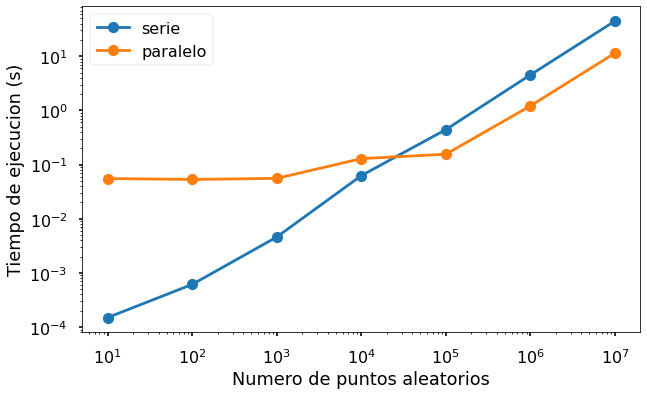

In [14]:
# Graficos de comparacion
plt.figure(figsize = (10, 6))
plt.plot(n_run, t_serial, '-o', label = 'serie')
plt.plot(n_run, t_parallel, '-o', label = 'paralelo')
plt.loglog()
plt.legend()
plt.ylabel('Tiempo de ejecucion (s)')
plt.xlabel('Numero de puntos aleatorios')
plt.show()

## Usando ``joblib``

En Python, también hay otros paquetes de terceros que pueden facilitar la computación paralela, especialmente para algunas tareas diarias. joblib es uno de ellos, proporciona una forma fácil y sencilla de hacer computación paralela (también tiene muchos otros usos).

In [15]:
from joblib import Parallel, delayed

In [18]:
def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2

In [19]:
# Hacemos pruebas
results = Parallel(n_jobs=8)\
    (delayed(random_square)(i) for i in range(1000000))

In [20]:
# Hacemos pruebas con todos los CPUs disponnibles
results = Parallel(n_jobs=-1, verbose=1)\
    (delayed(random_square)(i) for i in range(1000000))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 4072 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 663528 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1000000 out of 1000000 | elapsed:    4.6s finished


Hay múltiples backends en joblib, lo que significa utilizar diferentes formas de realizar la computación paralela. Si configuras el backend como multiprocesamiento, bajo el capó, en realidad se crea un grupo de multiprocesamiento que usa procesos de activación de Python separados para ejecutar tareas simultáneamente en CPU separadas.

In [21]:
results = \
    Parallel(n_jobs=-1, backend='multiprocessing', verbose=1)\
    (delayed(random_square)(i) for i in range(1000000))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 4072 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 977503 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1000000 out of 1000000 | elapsed:    4.4s finished
